# Libraries

In [1]:
# Install libraries (Colab-safe)
!pip install nltk spacy wordcloud gradio language_tool_python
!python -m spacy download en_core_web_sm

# Imports
import pandas as pd
import numpy as np
import re
import nltk
import spacy
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords, words
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import gradio as gr
import language_tool_python

# Downloads
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('words')
nlp = spacy.load("en_core_web_sm")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.7/54.7 kB 1.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.1/54.1 MB 19.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 322.9/322.9 kB 19.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.1/55.1 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.2/95.2 kB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.5/11.5 MB 108.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.5/62.5 kB 4.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 92.4 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting t

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.


In [2]:
# Data Dictionary https://www.kaggle.com/datasets/razanaqvi14/real-and-fake-news?select=True.csv

#**Importing Dataset**

##Load Dataset and Drop Unnecessary column

In [3]:
# Load the dataset
df_fake = pd.read_csv('/content/Fake.csv')
df_true = pd.read_csv('/content/True.csv')

In [4]:
df_fake.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [5]:
df_true.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [6]:
print("Fake News Dataset Info:")
print(df_fake.info())

print("\nTrue News Dataset Info:")
print(df_true.info())

Fake News Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23481 entries, 0 to 23480
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    23481 non-null  object
 1   text     23481 non-null  object
 2   subject  23481 non-null  object
 3   date     23481 non-null  object
dtypes: object(4)
memory usage: 733.9+ KB
None

True News Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21417 entries, 0 to 21416
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    21417 non-null  object
 1   text     21417 non-null  object
 2   subject  21417 non-null  object
 3   date     21417 non-null  object
dtypes: object(4)
memory usage: 669.4+ KB
None


In [7]:
# Drop 'date' and 'subject' columns from both DataFrames
df_fake = df_fake.drop(columns=['date', 'subject'])
df_true = df_true.drop(columns=['date', 'subject'])

In [8]:
# Add labels: 1 for fake, 0 for real
df_fake['label'] = 1
df_true['label'] = 0

# Merge both DataFrames
df = pd.concat([df_fake, df_true], axis=0).reset_index(drop=True)

# Shuffle the merged DataFrame
df = df.sample(frac=1, random_state=42).reset_index(drop=True)

# Check shape and preview
print(f"Merged dataset shape: {df.shape}")
df.head()

Merged dataset shape: (44898, 3)


,title,text,label
0,Ben Stein Calls Out 9th Circuit Court: Committ...,"21st Century Wire says Ben Stein, reputable pr...",1
1,Trump drops Steve Bannon from National Securit...,WASHINGTON (Reuters) - U.S. President Donald T...,0
2,Puerto Rico expects U.S. to lift Jones Act shi...,(Reuters) - Puerto Rico Governor Ricardo Rosse...,0
3,OOPS: Trump Just Accidentally Confirmed He Le...,"On Monday, Donald Trump once again embarrassed...",1
4,Donald Trump heads for Scotland to reopen a go...,"GLASGOW, Scotland (Reuters) - Most U.S. presid...",0


# Data Checking

## Missing Values

In [9]:
print("Missing values per column:")
print(df.isnull().sum())

Missing values per column:
title    0
text     0
label    0
dtype: int64


## Data Duplication Handling

In [10]:
# Check if there are any duplicate rows
print("Number of duplicate rows:", df.duplicated().sum())

# Optionally show a few duplicate rows
print("\nSample duplicate rows:")
print(df[df.duplicated()].head())

Number of duplicate rows: 5793

Sample duplicate rows:
                                                  title  \
1043  CHILLING PHOTO Captures FEMALE SUICIDE BOMBER ...   
1158  TEEN VOGUE Publishes Article To Teach Teen Gir...   
1343  THOUGHT POLICE: US Border Control Wants to Stu...   
1366  WATCH: BLACK SPORTS HOST BLASTS White ESPN Spo...   
1371  LOL! This One Picture Sums Up Trump’s BRUTAL S...   

                                                   text  label  
1043  Why would President Trump want America to enfo...      1  
1158  Two months before the 2016 election, Teen Vogu...      1  
1343  Patrick Henningsen 21st Century WireIf this la...      1  
1366  When will Americans stop being afraid of stand...      1  
1371  Rush Limbaugh nailed it today when he said:  T...      1  


In [11]:
# Drop duplicates
df = df.drop_duplicates().reset_index(drop=True)

# EDA

## Dataset Summary & Class Distribution

In [12]:
# Text length (in words)
df['word_count'] = df['text'].apply(lambda x: len(str(x).split()))
df['char_count'] = df['text'].apply(lambda x: len(str(x)))
print(df[['word_count', 'char_count']].describe())

         word_count    char_count
count  39105.000000  39105.000000
mean     398.522567   2428.043217
std      314.998489   1943.270658
min        0.000000      1.000000
25%      208.000000   1267.000000
50%      366.000000   2211.000000
75%      508.000000   3080.000000
max     8135.000000  51794.000000


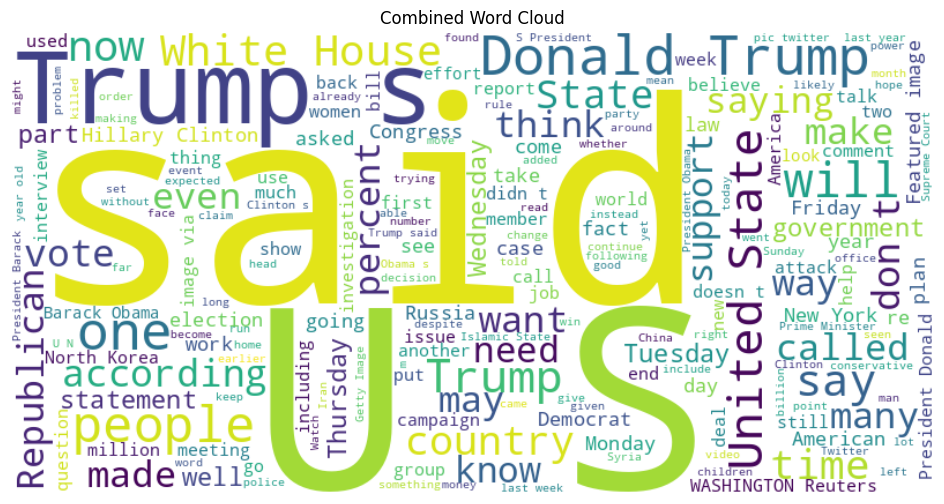

In [13]:
# Word Cloud
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(df['text']))
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Combined Word Cloud")
plt.show()

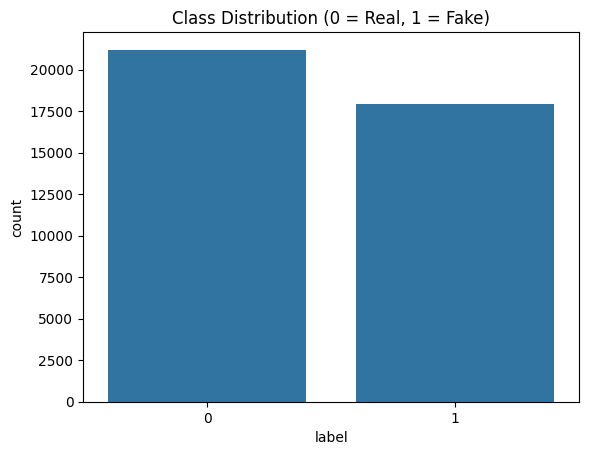

In [14]:
# Class Balance
sns.countplot(x='label', data=df)
plt.title("Class Distribution (0 = Real, 1 = Fake)")
plt.show()

## Text Length Analysis

In [15]:
# Word and character count per article
df['word_count'] = df['text'].apply(lambda x: len(str(x).split()))
df['char_count'] = df['text'].apply(lambda x: len(str(x)))

# Summary stats
print(df[['word_count', 'char_count']].describe())

         word_count    char_count
count  39105.000000  39105.000000
mean     398.522567   2428.043217
std      314.998489   1943.270658
min        0.000000      1.000000
25%      208.000000   1267.000000
50%      366.000000   2211.000000
75%      508.000000   3080.000000
max     8135.000000  51794.000000


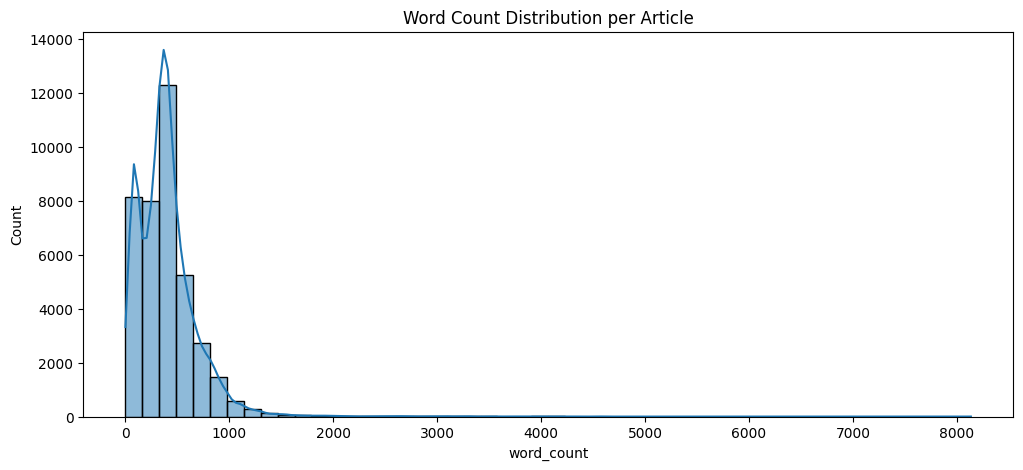

In [16]:
# Plots
plt.figure(figsize=(12, 5))
sns.histplot(df['word_count'], bins=50, kde=True)
plt.title("Word Count Distribution per Article")
plt.show()

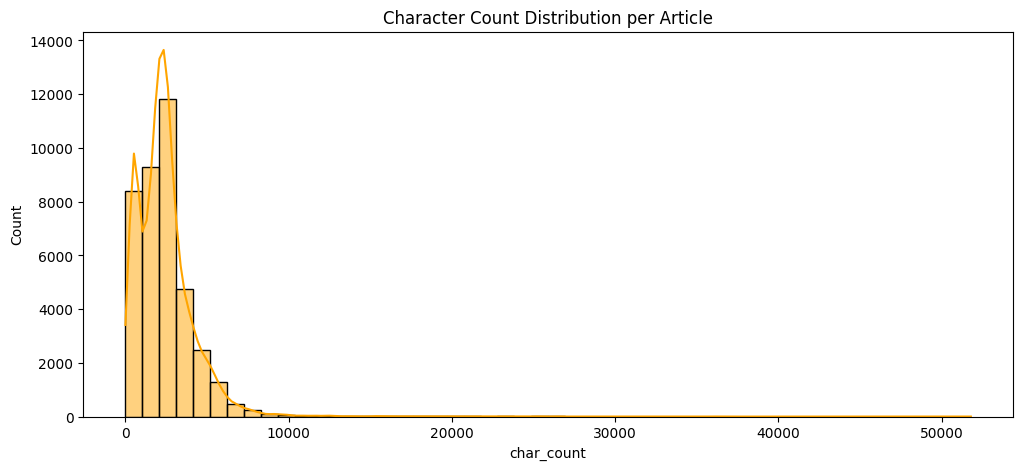

In [17]:
plt.figure(figsize=(12, 5))
sns.histplot(df['char_count'], bins=50, kde=True, color='orange')
plt.title("Character Count Distribution per Article")
plt.show()

## Most Common Words (Post Tokenization)

In [18]:
from collections import Counter
from nltk.tokenize import word_tokenize
import nltk

# Download the 'punkt_tab' resource
nltk.download('punkt_tab')

# Tokenize all text
all_words = ' '.join(df['text'].astype(str))
tokens = word_tokenize(all_words.lower())
words_only = [w for w in tokens if w.isalpha()]

# Get frequency
common_words = Counter(words_only).most_common(20)
print("Top 20 most common words:")
for word, freq in common_words:
    print(f"{word}: {freq}")

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


Top 20 most common words:
the: 861113
to: 459652
of: 374205
a: 353090
and: 345805
in: 298305
that: 203872
s: 197921
on: 167333
for: 147472
is: 140716
said: 120822
trump: 117622
he: 117242
it: 110658
with: 100859
was: 96864
as: 88029
his: 84248
by: 81115


## Word Cloud

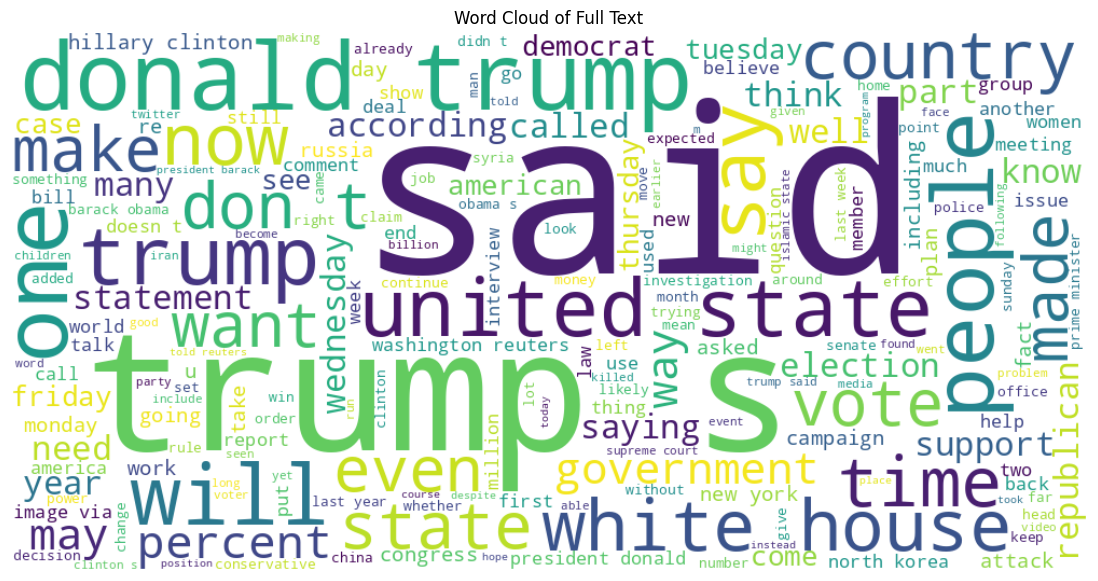

In [19]:
from wordcloud import WordCloud

wordcloud = WordCloud(width=1000, height=500, background_color='white').generate(' '.join(words_only))
plt.figure(figsize=(15, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud of Full Text")
plt.show()

## Stopword

In [20]:
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

stopword_counts = Counter([w for w in words_only if w in stop_words])
print("Top Stopwords:")
print(stopword_counts.most_common(15))

Top Stopwords:
[('the', 861113), ('to', 459652), ('of', 374205), ('a', 353090), ('and', 345805), ('in', 298305), ('that', 203872), ('s', 197921), ('on', 167333), ('for', 147472), ('is', 140716), ('he', 117242), ('it', 110658), ('with', 100859), ('was', 96864)]


## Bigram Analysis

In [21]:
# Bigram frequency
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(ngram_range=(2, 2), stop_words='english', max_features=30)
X2 = vectorizer.fit_transform(df['text'])
bigrams = vectorizer.get_feature_names_out()
counts = X2.sum(axis=0).A1
bigram_freq = dict(zip(bigrams, counts))

# Top bigrams
print("\nTop Bigrams:")
for bigram, count in sorted(bigram_freq.items(), key=lambda x: x[1], reverse=True)[:20]:
    print(f"{bigram}: {count}")


Top Bigrams:
donald trump: 24113
united states: 16974
white house: 13528
hillary clinton: 7918
new york: 7868
featured image: 7692
washington reuters: 6643
president donald: 6568
north korea: 6160
twitter com: 5125
pic twitter: 4909
barack obama: 4899
trump said: 4839
prime minister: 4504
said statement: 4311
year old: 4194
getty images: 4022
supreme court: 3878
islamic state: 3768
president obama: 3628


## Label-wise Comparison of Word/Char Counts

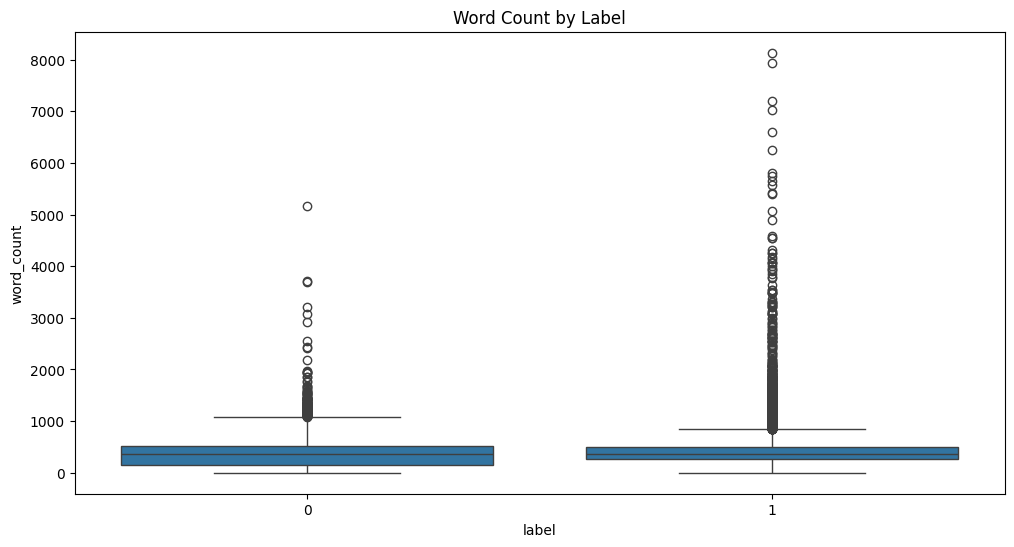

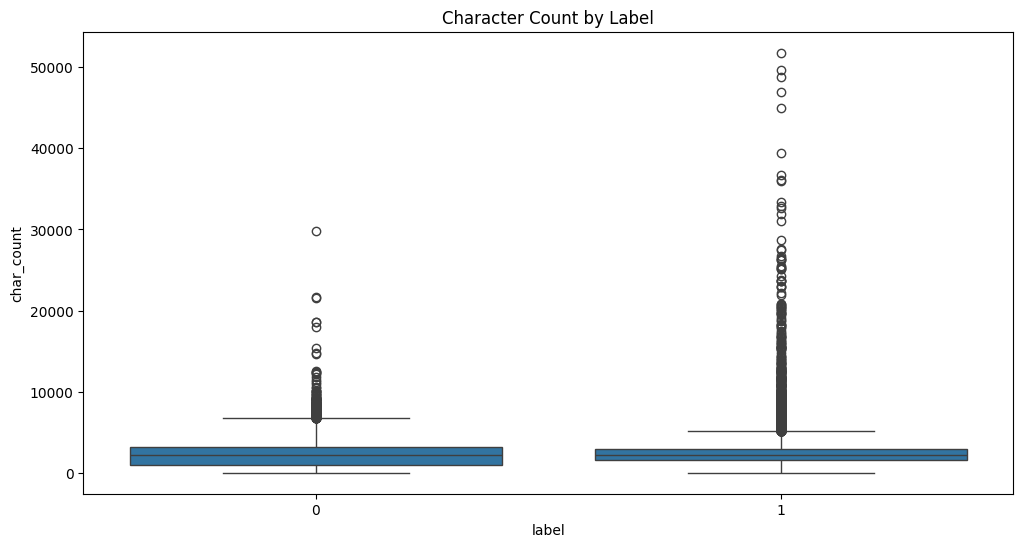

In [22]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='label', y='word_count', data=df)
plt.title("Word Count by Label")
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(x='label', y='char_count', data=df)
plt.title("Character Count by Label")
plt.show()

## Class-Conditional Word Clouds

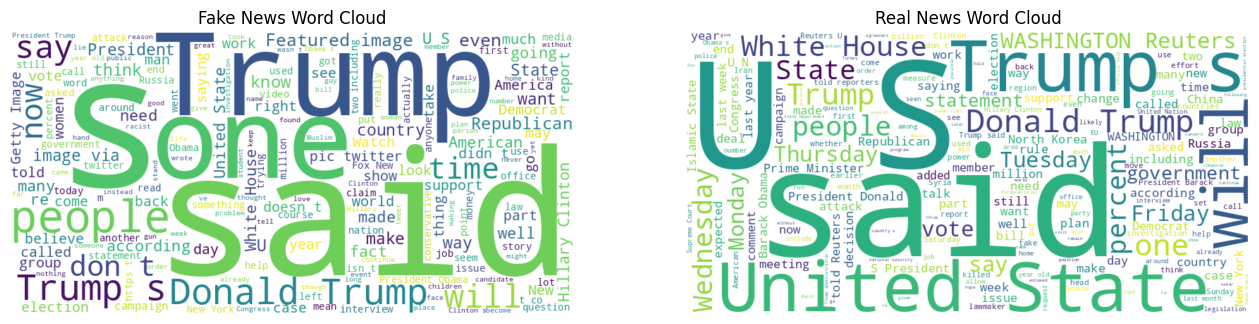

In [23]:
# WordCloud for Fake news
fake_text = ' '.join(df[df['label'] == 1]['text'])
real_text = ' '.join(df[df['label'] == 0]['text'])

fake_wc = WordCloud(width=800, height=400, background_color='white').generate(fake_text)
real_wc = WordCloud(width=800, height=400, background_color='white').generate(real_text)

plt.figure(figsize=(16, 7))
plt.subplot(1, 2, 1)
plt.imshow(fake_wc, interpolation='bilinear')
plt.title("Fake News Word Cloud")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(real_wc, interpolation='bilinear')
plt.title("Real News Word Cloud")
plt.axis("off")

plt.show()

# Pre-Processing

## Initialize Tools

In [24]:
stop_words = set(stopwords.words('english'))
english_vocab = set(words.words())
lemmatizer = WordNetLemmatizer()

In [25]:
# === 4. Define Preprocessing Function ===
def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'\d+', '', text)
    text = re.sub(r'[^a-z\s]', '', text)
    tokens = word_tokenize(text)
    cleaned = [
        lemmatizer.lemmatize(w)
        for w in tokens
        if w not in stop_words and w in english_vocab and len(w) > 2
    ]
    return ' '.join(cleaned)

In [26]:
# === 5. Apply to Dataset (Main Text Column) ===
df['cleaned_text'] = df['text'].astype(str).apply(preprocess_text)

# === 6. Preview and Stats ===
print("Original Example:\n", df['text'].iloc[0][:300])
print("\nCleaned Example:\n", df['cleaned_text'].iloc[0])
print("\nTotal Words in Cleaned Text:", sum(df['cleaned_text'].str.split().map(len)))
print("Unique Words:", len(set(' '.join(df['cleaned_text']).split())))

Original Example:
 21st Century Wire says Ben Stein, reputable professor from, Pepperdine University (also of some Hollywood fame appearing in TV shows and films such as Ferris Bueller s Day Off) made some provocative statements on Judge Jeanine Pirro s show recently. While discussing the halt that was imposed on Pres

Cleaned Example:
 century wire ben stein reputable professor university also fame day made provocative judge show recently halt president trump executive order travel stein circuit court state coup tat executive branch constitution stein went call political judiciary political watch interview complete note stark contrast rhetoric leftist medium neglect note court ever blocked presidential immigration past discus legal efficacy halt actual text executive trump news century wire trump work becoming member

Total Words in Cleaned Text: 5803793
Unique Words: 26781


In [27]:
# === 7. Save Preprocessed Data (Optional) ===
df.to_csv("cleaned_news_dataset.csv", index=False)

## TF-IDF Vectorization

In [28]:
# === 2. Prepare Features and Labels ===
X = df['cleaned_text']
y = df['label']

# === 3. Train-Test Split ===
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# === 4. TF-IDF Vectorization ===
tfidf = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

print(f"TF-IDF matrix shape (train): {X_train_tfidf.shape}")

TF-IDF matrix shape (train): (31284, 5000)


## Logistic Regression Training

🔹 Accuracy: 0.9719984656693518

🔹 Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.98      0.97      4239
           1       0.97      0.96      0.97      3582

    accuracy                           0.97      7821
   macro avg       0.97      0.97      0.97      7821
weighted avg       0.97      0.97      0.97      7821



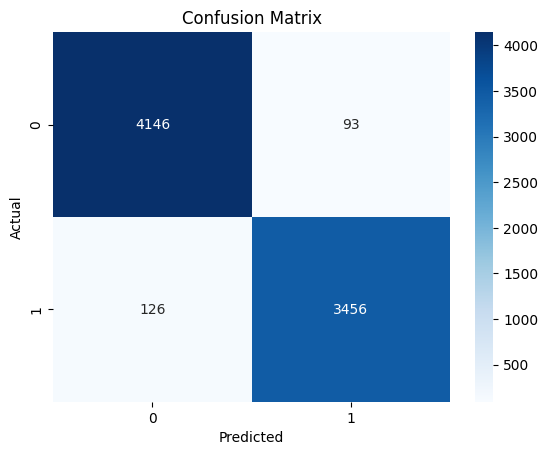

In [29]:
# === 5. Train Logistic Regression ===
model = LogisticRegression(max_iter=1000)
model.fit(X_train_tfidf, y_train)

# === 6. Predictions ===
y_pred = model.predict(X_test_tfidf)

# === 7. Evaluation ===
print("🔹 Accuracy:", accuracy_score(y_test, y_pred))
print("\n🔹 Classification Report:\n", classification_report(y_test, y_pred))

# === 8. Confusion Matrix ===
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

### Save Model

In [30]:
import pickle

# Save model and vectorizer
with open("logistic_model.pkl", "wb") as f:
    pickle.dump(model, f)

with open("tfidf_vectorizer.pkl", "wb") as f:
    pickle.dump(tfidf, f)

## Sentiment & Subjectivity Analysis Block

In [31]:
!pip install textblob
from textblob import TextBlob

In [32]:
# Compute polarity and subjectivity
def analyze_sentiment(text):
    blob = TextBlob(text)
    return blob.sentiment.polarity, blob.sentiment.subjectivity

# Apply to DataFrame
df[['polarity', 'subjectivity']] = df['cleaned_text'].apply(
    lambda x: pd.Series(analyze_sentiment(x))
)

# Preview
df[['label', 'polarity', 'subjectivity']].head()

,label,polarity,subjectivity
0,1,0.068182,0.386364
1,0,0.107079,0.348730
2,0,0.051823,0.452976
3,1,-0.039286,0.699524
4,0,0.016540,0.283997


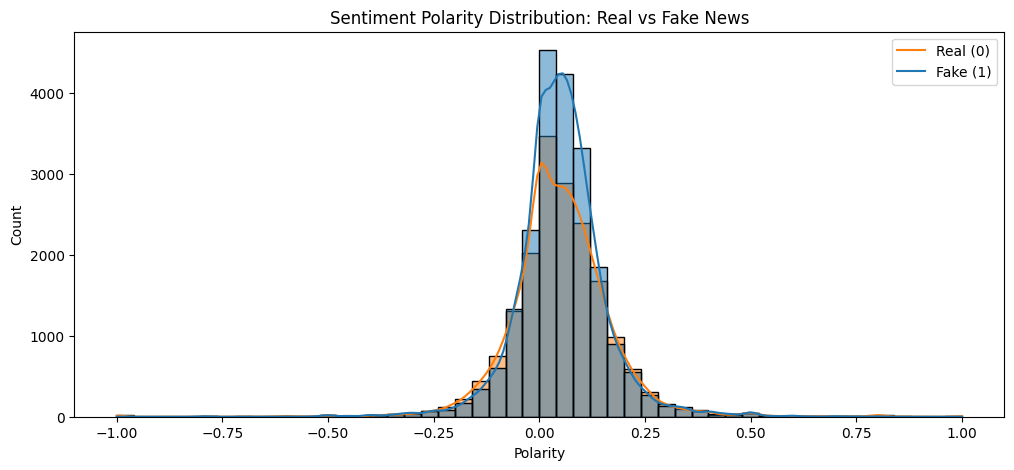

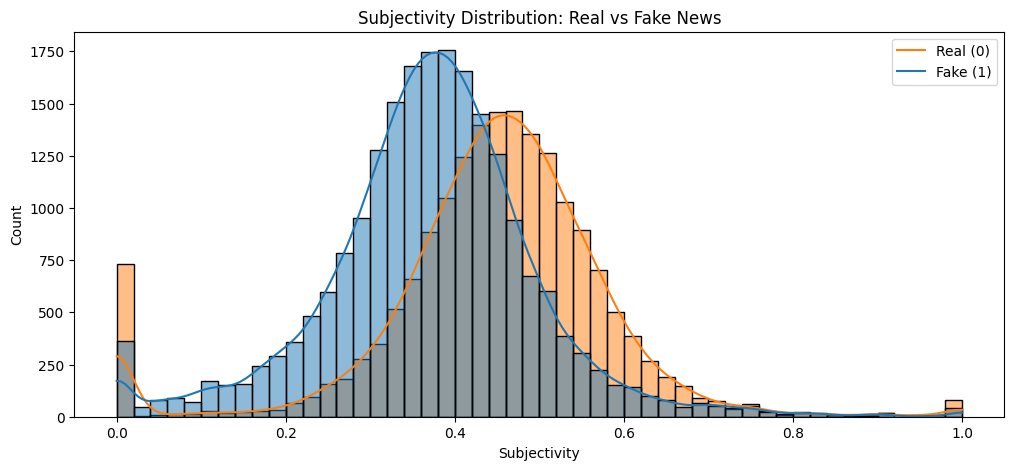

In [33]:
# Polarity by class
plt.figure(figsize=(12, 5))
sns.histplot(data=df, x='polarity', hue='label', bins=50, kde=True)
plt.title("Sentiment Polarity Distribution: Real vs Fake News")
plt.xlabel("Polarity")
plt.legend(['Real (0)', 'Fake (1)'])
plt.show()

# Subjectivity by class
plt.figure(figsize=(12, 5))
sns.histplot(data=df, x='subjectivity', hue='label', bins=50, kde=True)
plt.title("Subjectivity Distribution: Real vs Fake News")
plt.xlabel("Subjectivity")
plt.legend(['Real (0)', 'Fake (1)'])
plt.show()

In [34]:
# Group-level sentiment stats
grouped_sentiment = df.groupby('label')[['polarity', 'subjectivity']].mean()
print("Average Sentiment & Subjectivity by Class (0 = Real, 1 = Fake):\n")
print(grouped_sentiment)

Average Sentiment & Subjectivity by Class (0 = Real, 1 = Fake):

       polarity  subjectivity
label                        
0      0.051942      0.371139
1      0.049309      0.445549


## Linguistic Pattern Analysis Block (POS, Lexical Richness, Readability)

In [35]:
!pip install spacy textstat
!python -m spacy download en_core_web_sm

import spacy
import textstat
from tqdm import tqdm

nlp = spacy.load("en_core_web_sm")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 175.3/175.3 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 939.4/939.4 kB 22.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 26.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 3.2 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


**1. Define Feature Extraction Functions**

In [36]:
# Enable tqdm progress bar for spaCy processing
tqdm.pandas()

# POS tag ratios and lexical richness
def extract_linguistic_features(text):
    doc = nlp(text)

    word_count = len([token for token in doc if token.is_alpha])
    unique_words = len(set([token.text.lower() for token in doc if token.is_alpha]))
    lexical_richness = unique_words / word_count if word_count else 0

    pos_counts = doc.count_by(spacy.attrs.POS)
    noun_count = pos_counts.get(nlp.vocab.strings['NOUN'], 0)
    verb_count = pos_counts.get(nlp.vocab.strings['VERB'], 0)
    adj_count = pos_counts.get(nlp.vocab.strings['ADJ'], 0)
    adv_count = pos_counts.get(nlp.vocab.strings['ADV'], 0)

    return pd.Series({
        'lexical_richness': lexical_richness,
        'noun_ratio': noun_count / word_count if word_count else 0,
        'verb_ratio': verb_count / word_count if word_count else 0,
        'adj_ratio': adj_count / word_count if word_count else 0,
        'adv_ratio': adv_count / word_count if word_count else 0
    })

**2. Apply Linguistic Feature Extraction**

In [37]:
# Apply to cleaned text (you can limit to a sample if it's slow)
linguistic_features = df['cleaned_text'].progress_apply(extract_linguistic_features)
df = pd.concat([df, linguistic_features], axis=1)

# Preview
df[['label', 'lexical_richness', 'noun_ratio', 'verb_ratio', 'adj_ratio', 'adv_ratio']].head()

100%|██████████| 39105/39105 [21:04<00:00, 30.91it/s]


,label,lexical_richness,noun_ratio,verb_ratio,adj_ratio,adv_ratio
0,1,0.823529,0.455882,0.102941,0.191176,0.044118
1,0,0.633333,0.380000,0.170000,0.183333,0.043333
2,0,0.705882,0.445378,0.226891,0.109244,0.067227
3,1,0.703125,0.421875,0.250000,0.046875,0.125000
4,0,0.775120,0.416268,0.172249,0.153110,0.028708


** 3. Readability Scores**

In [38]:
# Apply textstat readability measures
df['flesch_reading_ease'] = df['text'].apply(lambda x: textstat.flesch_reading_ease(x))
df['smog_index'] = df['text'].apply(lambda x: textstat.smog_index(x))

**4. Compare Linguistic Features by Class**

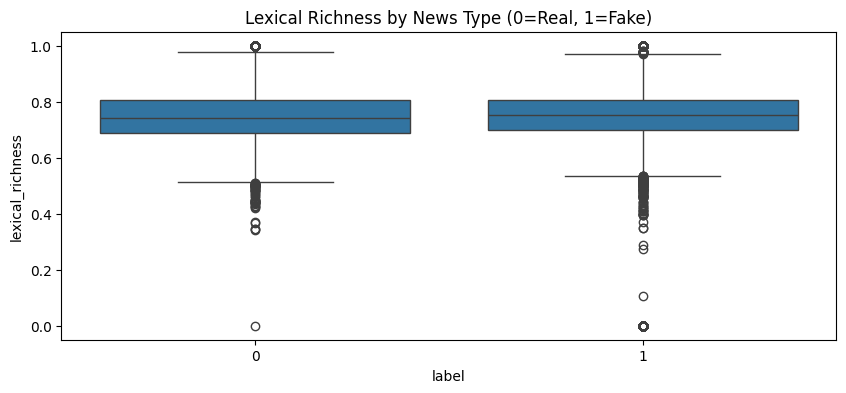

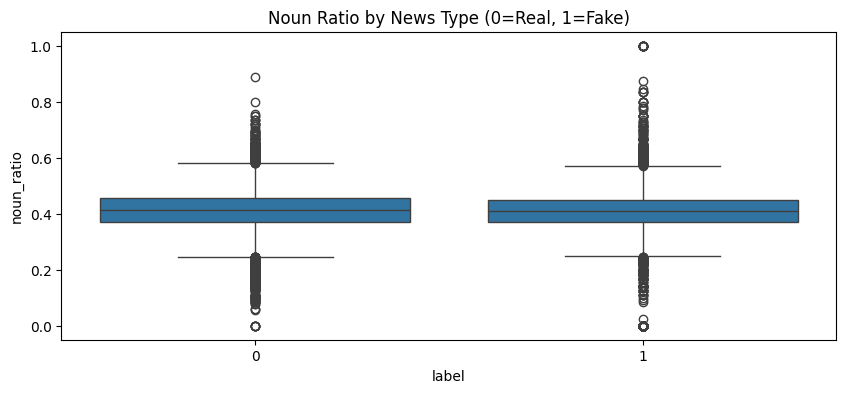

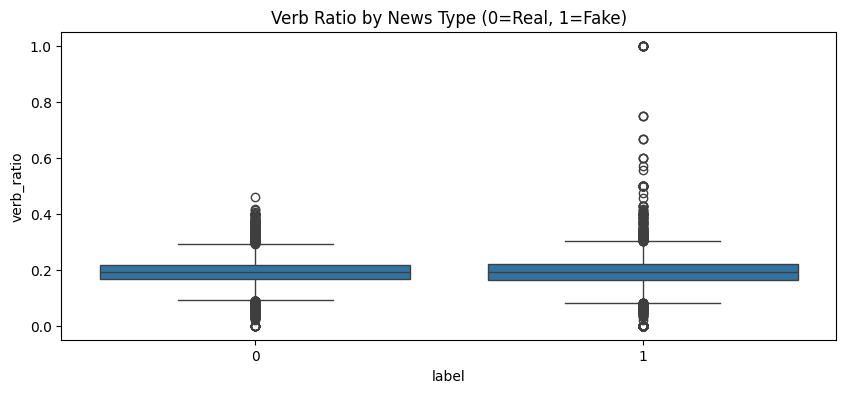

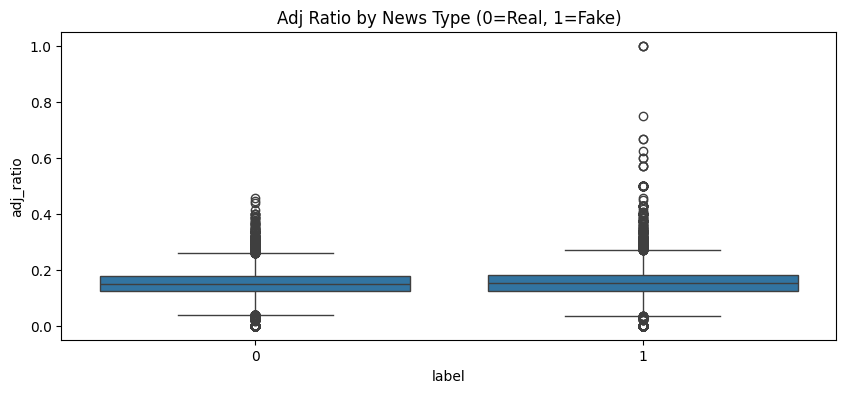

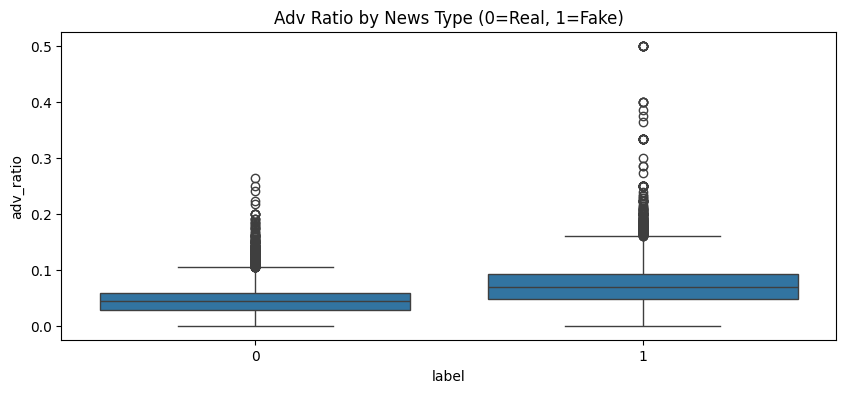

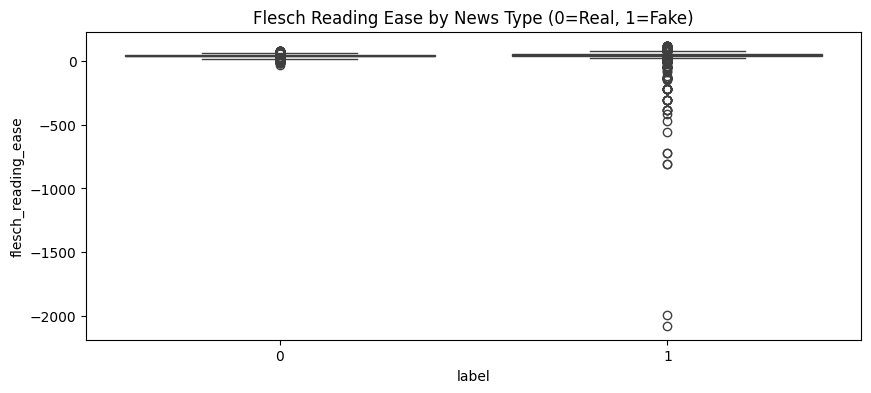

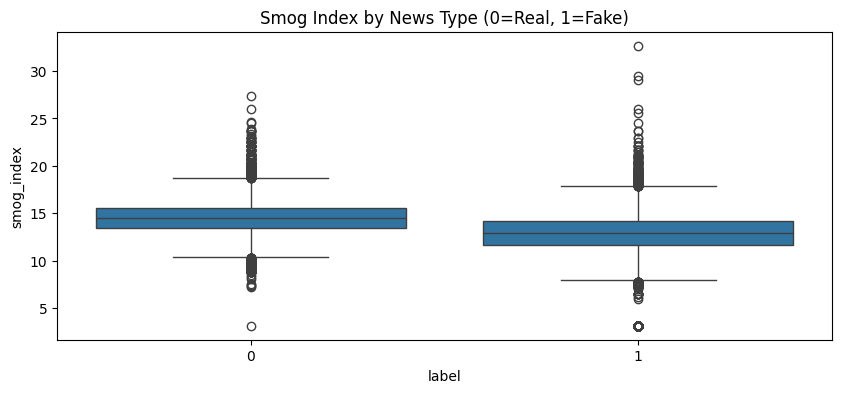

In [39]:
# Visual comparison of features
import seaborn as sns
import matplotlib.pyplot as plt

features = ['lexical_richness', 'noun_ratio', 'verb_ratio', 'adj_ratio', 'adv_ratio',
            'flesch_reading_ease', 'smog_index']

for feature in features:
    plt.figure(figsize=(10, 4))
    sns.boxplot(x='label', y=feature, data=df)
    plt.title(f"{feature.replace('_', ' ').title()} by News Type (0=Real, 1=Fake)")
    plt.show()

# Model

In [40]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

## Naïve Bayes

🔹 Naïve Bayes Accuracy: 0.9122874312747731

🔹 Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.94      0.92      4239
           1       0.92      0.88      0.90      3582

    accuracy                           0.91      7821
   macro avg       0.91      0.91      0.91      7821
weighted avg       0.91      0.91      0.91      7821



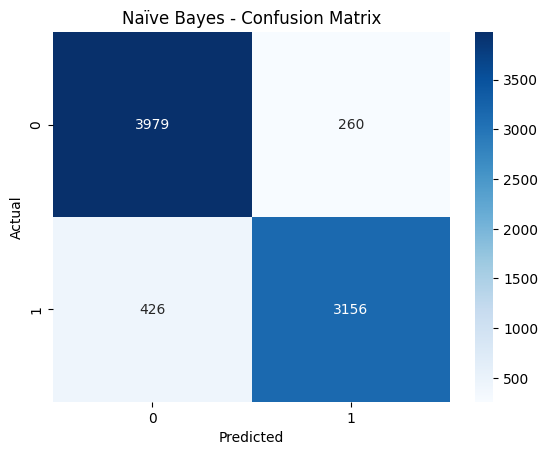

In [41]:
# === Naive Bayes Model ===
nb_model = MultinomialNB()
nb_model.fit(X_train_tfidf, y_train)

# Predict
y_pred_nb = nb_model.predict(X_test_tfidf)

# Evaluation
print("🔹 Naïve Bayes Accuracy:", accuracy_score(y_test, y_pred_nb))
print("\n🔹 Classification Report:\n", classification_report(y_test, y_pred_nb))

# Confusion Matrix
cm_nb = confusion_matrix(y_test, y_pred_nb)
sns.heatmap(cm_nb, annot=True, fmt='d', cmap='Blues')
plt.title("Naïve Bayes - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

##  Random Forest

🔹 Random Forest Accuracy: 0.9631760644418872

🔹 Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.99      0.97      4239
           1       0.98      0.94      0.96      3582

    accuracy                           0.96      7821
   macro avg       0.97      0.96      0.96      7821
weighted avg       0.96      0.96      0.96      7821



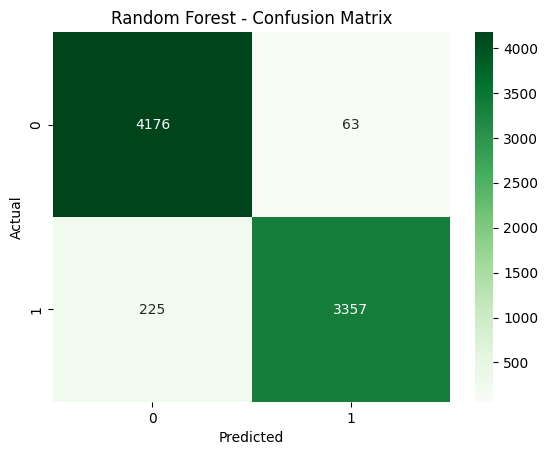

In [42]:
# === Random Forest Model ===
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_tfidf, y_train)

# Predict
y_pred_rf = rf_model.predict(X_test_tfidf)

# Evaluation
print("🔹 Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("\n🔹 Classification Report:\n", classification_report(y_test, y_pred_rf))

# Confusion Matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Greens')
plt.title("Random Forest - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

## Compare Baseline Models

In [43]:
# Compile model accuracy scores
model_scores = pd.DataFrame({
    'Model': ['Logistic Regression', 'Naïve Bayes', 'Random Forest'],
    'Accuracy': [
        accuracy_score(y_test, y_pred),      # from Logistic Regression earlier
        accuracy_score(y_test, y_pred_nb),
        accuracy_score(y_test, y_pred_rf)
    ]
})

print(model_scores)

                 Model  Accuracy
0  Logistic Regression  0.971998
1          Naïve Bayes  0.912287
2        Random Forest  0.963176


## Random Forest Tuning

In [44]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [45]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# === Define a smaller, efficient parameter grid ===
param_dist = {
    'n_estimators': [100, 200],             # Fewer options
    'max_depth': [10, 20, None],            # Key depths
    'min_samples_split': [2, 5],            # Moderate split values
    'min_samples_leaf': [1, 2],             # Small leaf size
    'max_features': ['sqrt', 'log2'],       # Common feature options
    'bootstrap': [True]                     # Avoid testing False unless needed
}

# === Initialize base Random Forest ===
rf = RandomForestClassifier(random_state=42)

# === Use RandomizedSearchCV with reduced iterations and folds ===
rf_random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    n_iter=10,              # Reduced from 30 to 10
    cv=3,                   # Reduced from 5 to 3 folds
    verbose=1,
    random_state=42,
    n_jobs=-1               # Use all available cores
)

# === Optional: Sample down training data (only for tuning) ===
from sklearn.model_selection import train_test_split
X_tune, _, y_tune, _ = train_test_split(X_train_tfidf, y_train, train_size=0.3, random_state=42)

# === Fit on sampled training data ===
rf_random_search.fit(X_tune, y_tune)

# === Retrieve best model ===
best_rf = rf_random_search.best_estimator_
print("Best Hyperparameters:\n", rf_random_search.best_params_)


Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best Hyperparameters:
 {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': None, 'bootstrap': True}


🔹 Tuned Random Forest Accuracy: 0.9579337680603504

🔹 Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.98      0.96      4239
           1       0.98      0.93      0.95      3582

    accuracy                           0.96      7821
   macro avg       0.96      0.96      0.96      7821
weighted avg       0.96      0.96      0.96      7821



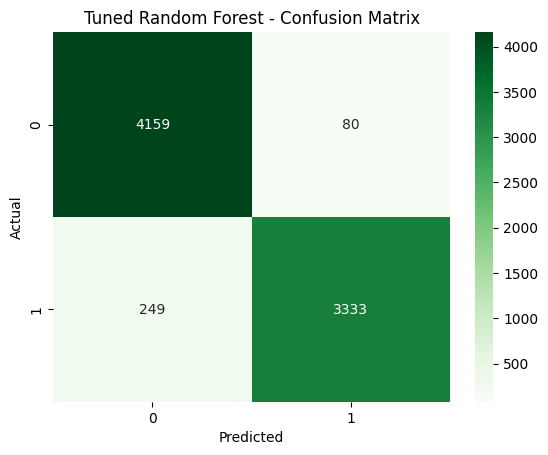

In [46]:
# === Predict on full test set ===
y_pred_rf_tuned = best_rf.predict(X_test_tfidf)

# === Accuracy ===
print("🔹 Tuned Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf_tuned))

# === Classification report ===
print("\n🔹 Classification Report:\n", classification_report(y_test, y_pred_rf_tuned))

# === Confusion matrix ===
cm = confusion_matrix(y_test, y_pred_rf_tuned)
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens')
plt.title("Tuned Random Forest - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

## Logistic Regression tuning

In [47]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

In [48]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# ✅ Reduce to top-performing options only
param_grid = {
    'C': [0.1, 1, 10],               # Common sweet spots
    'penalty': ['l2'],               # l1 often fails without sparse data
    'solver': ['liblinear']         # Fast and supports both L1/L2
}

# Base model
log_reg = LogisticRegression(max_iter=1000, random_state=42)

# GridSearchCV (only 3 combinations × 3 folds = 9 fits total)
grid_search_lr = GridSearchCV(
    estimator=log_reg,
    param_grid=param_grid,
    scoring='accuracy',
    cv=3,                # Reduce from 5 to 3 for faster tuning
    verbose=1,
    n_jobs=-1
)

# Fit model
grid_search_lr.fit(X_train_tfidf, y_train)

# Best model and parameters
best_lr = grid_search_lr.best_estimator_
print("✅ Best Hyperparameters for Logistic Regression:\n", grid_search_lr.best_params_)

Fitting 3 folds for each of 3 candidates, totalling 9 fits
✅ Best Hyperparameters for Logistic Regression:
 {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}


🔹 Tuned Logistic Regression Accuracy: 0.9749392660785066

🔹 Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98      4239
           1       0.97      0.97      0.97      3582

    accuracy                           0.97      7821
   macro avg       0.97      0.97      0.97      7821
weighted avg       0.97      0.97      0.97      7821



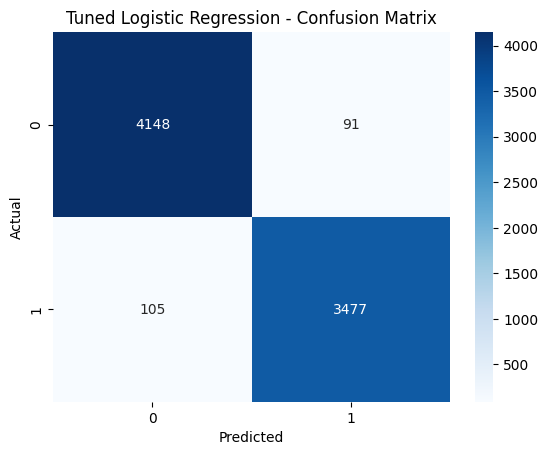

In [49]:
# Predict on test set
y_pred_lr_tuned = best_lr.predict(X_test_tfidf)

# Accuracy
print("🔹 Tuned Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr_tuned))

# Classification report
print("\n🔹 Classification Report:\n", classification_report(y_test, y_pred_lr_tuned))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred_lr_tuned)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Tuned Logistic Regression - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

## Compare All Models

In [50]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Helper to compute metrics
def get_metrics(y_true, y_pred):
    return {
        'Accuracy': accuracy_score(y_true, y_pred),
        'Precision': precision_score(y_true, y_pred),
        'Recall': recall_score(y_true, y_pred),
        'F1 Score': f1_score(y_true, y_pred)
    }

# Collect all models’ metrics
model_results = {
    'Logistic Regression (Base)': get_metrics(y_test, y_pred),
    'Logistic Regression (Tuned)': get_metrics(y_test, y_pred_lr_tuned),
    'Naïve Bayes': get_metrics(y_test, y_pred_nb),
    'Random Forest (Base)': get_metrics(y_test, y_pred_rf),
    'Random Forest (Tuned)': get_metrics(y_test, y_pred_rf_tuned)
}

# Convert to DataFrame
model_scores = pd.DataFrame(model_results).T.reset_index().rename(columns={'index': 'Model'})

# Round for readability
model_scores = model_scores.round(4)

# Display
print(model_scores)

                         Model  Accuracy  Precision  Recall  F1 Score
0   Logistic Regression (Base)    0.9720     0.9738  0.9648    0.9693
1  Logistic Regression (Tuned)    0.9749     0.9745  0.9707    0.9726
2                  Naïve Bayes    0.9123     0.9239  0.8811    0.9020
3         Random Forest (Base)    0.9632     0.9816  0.9372    0.9589
4        Random Forest (Tuned)    0.9579     0.9766  0.9305    0.9530


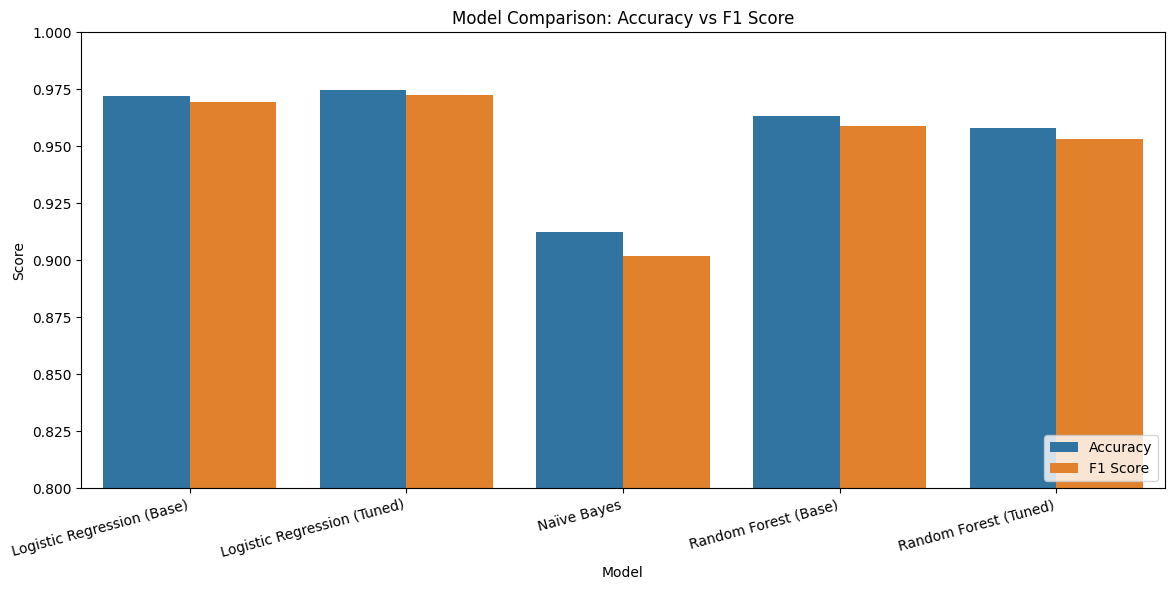

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns

# Reshape data for plotting
plot_df = model_scores[['Model', 'Accuracy', 'F1 Score']].melt(id_vars='Model',
                                                               var_name='Metric',
                                                               value_name='Score')

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(data=plot_df, x='Model', y='Score', hue='Metric')
plt.title('Model Comparison: Accuracy vs F1 Score')
plt.xticks(rotation=15, ha='right')
plt.ylim(0.8, 1.0)
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()

# GUI with Classifier an Language Tool Tabs

In [58]:
# === Setup: Install Libraries (for Colab or Jupyter) ===
!pip install gradio textblob language_tool_python
!pip install textblob
!python -m textblob.download_corpora

# === Imports ===
import gradio as gr
import pickle
import re
import language_tool_python
from textblob import TextBlob
from nltk import word_tokenize, pos_tag

[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Package brown is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package conll2000 to /root/nltk_data...
[nltk_data]   Package conll2000 is already up-to-date!
[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!
Finished.


In [59]:
# === Load Pretrained Logistic Regression Model and TF-IDF ===
with open("logistic_model.pkl", "rb") as f:
    model = pickle.load(f)

with open("tfidf_vectorizer.pkl", "rb") as f:
    tfidf = pickle.load(f)

# === Preprocessing Function (same as training pipeline) ===
def preprocess_text(text):
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)
    return text.lower()

## Fake News Classifier

In [60]:
# === Fake News Classifier ===
def classify_news(text):
    processed = preprocess_text(text)
    vect_text = tfidf.transform([processed])
    proba = model.predict_proba(vect_text)[0][1]
    label = "🔴 Fake News" if proba >= 0.5 else "🟢 Real News"
    return f"{label} (Confidence: {proba:.2f})"

## Spell Checker & and Grammar Correction

In [61]:
# === Spell Checker ===
class NewsSpellChecker:
    def __init__(self, vocabulary_path):
        # Create an empty set if file not found to avoid error.
        self.vocab = set()
        try:
            with open(vocabulary_path, 'r', encoding='utf-8') as f:
                self.vocab = set(w.strip().lower() for w in f if w.strip())
        except FileNotFoundError:
            print("Vocabulary file not found. Spell checking will be limited.")

    def correct_text(self, text):
        words = re.findall(r'\b\w+\b', text.lower())
        corrections = {}
        for word in words:
            if word not in self.vocab:
                # Provide default suggestion instead of error.
                corrections[word] = [("unknown", 0.0)]
        return corrections

spell_checker = NewsSpellChecker("fake_news_vocab.txt")
grammar_tool = language_tool_python.LanguageToolPublicAPI('en-US')

# === Generate Vocabulary ===
vocab = sorted(set(" ".join(df['cleaned_text']).split()))

# === Save to file ===
with open("fake_news_vocab.txt", "w", encoding="utf-8") as f:
    f.write("\n".join(vocab))

print("fake_news_vocab.txt created successfully.")

fake_news_vocab.txt created successfully.


In [62]:
def spell_and_grammar_correction(text):
    if not text.strip():
        return "No input provided.", "-", "-"

    corrections = spell_checker.correct_text(text)
    corrected = text
    for word, suggs in corrections.items():
        best = suggs[0][0]
        corrected = re.sub(rf"\\b{word}\\b", best, corrected, flags=re.IGNORECASE)

    grammar_corrected = language_tool_python.utils.correct(corrected, grammar_tool.check(corrected))

    suggestion_str = "\n".join([f"{word} → {[s[0] for s in suggs]}" for word, suggs in corrections.items()]) \
                     if corrections else "✅ No spelling corrections needed."

    return suggestion_str, corrected, grammar_corrected

## Sentiment Analysis + Fake/Real Inference Based on Polarity

In [63]:
# === Sentiment Analysis + Fake/Real Inference Based on Polarity ===
def analyze_sentiment(text):
    if not text.strip():
        return "No input", "-", "-", "-"

    blob = TextBlob(text)
    polarity = blob.sentiment.polarity
    subjectivity = blob.sentiment.subjectivity
    sentiment_type = "🟢 Positive" if polarity > 0.1 else "🔴 Negative" if polarity < -0.1 else "⚪ Neutral"

    if polarity >= 0.2:
        comment = "May lean toward emotional or deceptive content. Possible Fake."
    elif polarity <= -0.2:
        comment = "Strongly negative tone detected. Cross-check with credible sources."
    else:
        comment = "Neutral tone. Likely more factual and reliable."

    return sentiment_type, f"{polarity:.2f}", f"{subjectivity:.2f}", comment

# GUI

In [67]:
# === GUI App ===
with gr.Blocks(title="Fake News Detection + Language Assistant", theme=gr.themes.Soft()) as app:
    gr.Markdown("""
    <style>
        body, textarea, input, button, label {
            font-family: 'Georgia', serif;
        }
        h1, p {
            font-family: 'Georgia', serif;
            text-align: center;
        }
    </style>

    <h1>📰 Fake News Detection System</h1>
    <p style='font-size: 16px;'>
    This Python programming tool to classifies news as <strong>Real</strong> or <strong>Fake</strong>,
    detects language errors, and analyzes emotional tone using sentiment analysis.
    </p>
    """, elem_id="title")

    # === Tab 1: News Classifier ===
    with gr.Tab("News Classifier"):
        input_text = gr.Textbox(lines=6, placeholder="Paste a news paragraph...", label="News Content")
        classify_btn = gr.Button("Classify")
        output = gr.Textbox(label="Prediction")
        classify_btn.click(fn=classify_news, inputs=input_text, outputs=output)

    # === Tab 2: Language Error Assistant ===
    with gr.Tab("Language Error Assistant"):
        spell_input = gr.Textbox(lines=6, placeholder="Enter text...", label="Input Text")
        correct_btn = gr.Button("🔧 Run Correction")
        suggestion_output = gr.Textbox(label="Spelling Suggestions")
        corrected_output = gr.Textbox(label="After Spelling Correction")
        grammar_output = gr.Textbox(label="After Grammar Correction")
        correct_btn.click(
            fn=spell_and_grammar_correction,
            inputs=spell_input,
            outputs=[suggestion_output, corrected_output, grammar_output]
        )

    # === Tab 3: Sentiment Analyzer ===
    # ✅ Moved inside the main gr.Blocks() context
    with gr.Tab("Sentiment Analyzer"):
        sentiment_input = gr.Textbox(lines=6, label="News Content")
        analyze_btn = gr.Button("Analyze Sentiment")
        sentiment_type = gr.Textbox(label="Sentiment Type", interactive=False)
        polarity_score = gr.Textbox(label="Polarity Score", interactive=False)
        subjectivity_score = gr.Textbox(label="Subjectivity Score", interactive=False)

        # Add default explanation here
        interpretation = gr.Textbox(
            label="Comment",
            value="🧠 Note: Sentiment score reflects emotional tone, not factual accuracy.",
            interactive=False
        )

        analyze_btn.click(
            fn=analyze_sentiment,
            inputs=sentiment_input,
            outputs=[sentiment_type, polarity_score, subjectivity_score, interpretation]
        )

In [68]:
# Launch the app
app.launch()

It looks like you are running Gradio on a hosted a Jupyter notebook. For the Gradio app to work, sharing must be enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://ec25c9177d3b27a07e.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


# Output

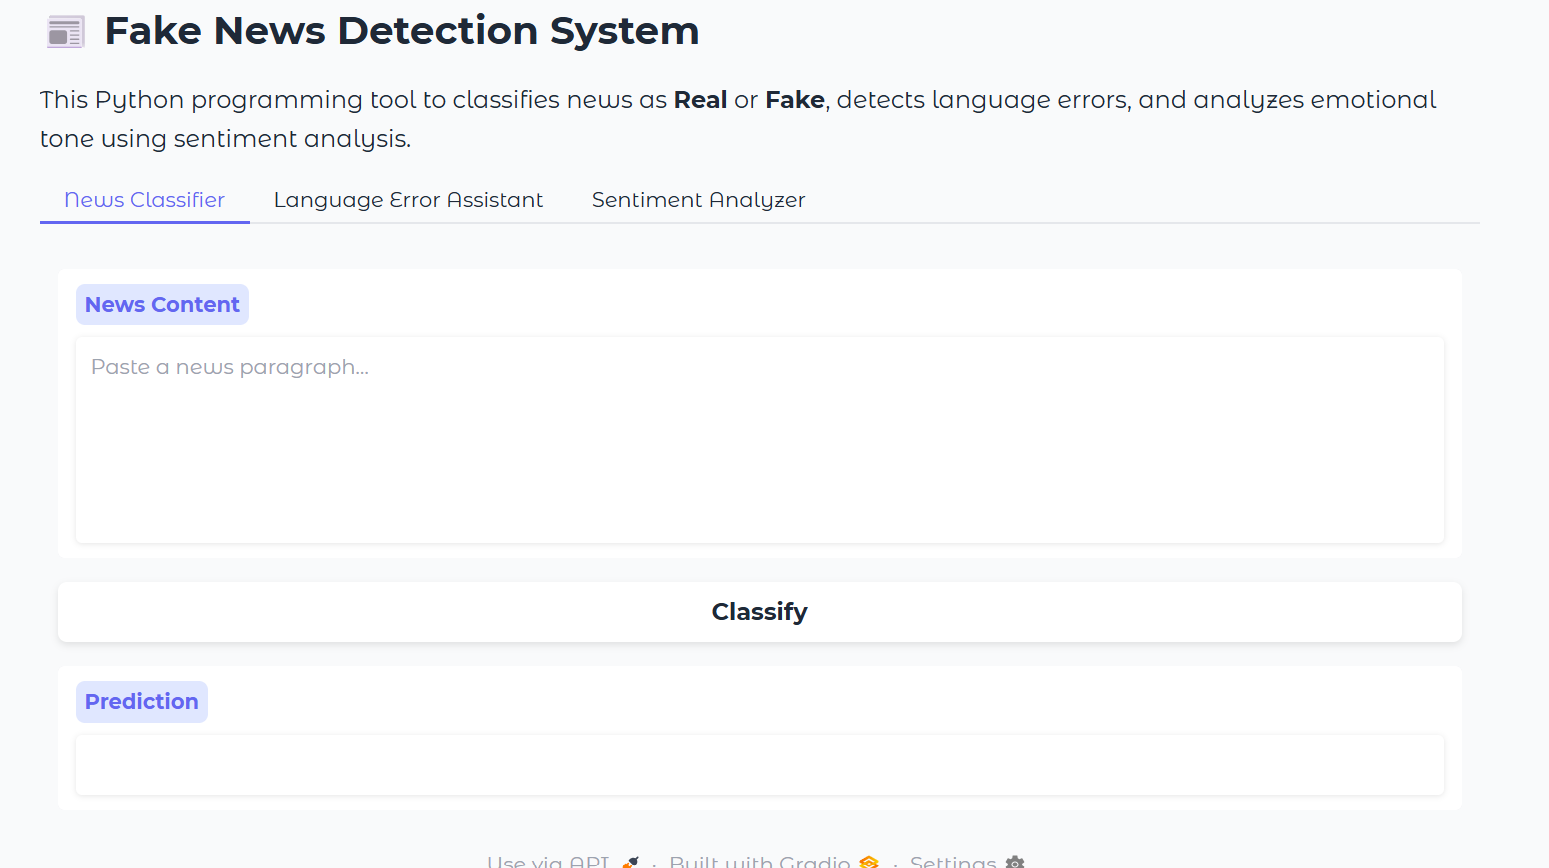

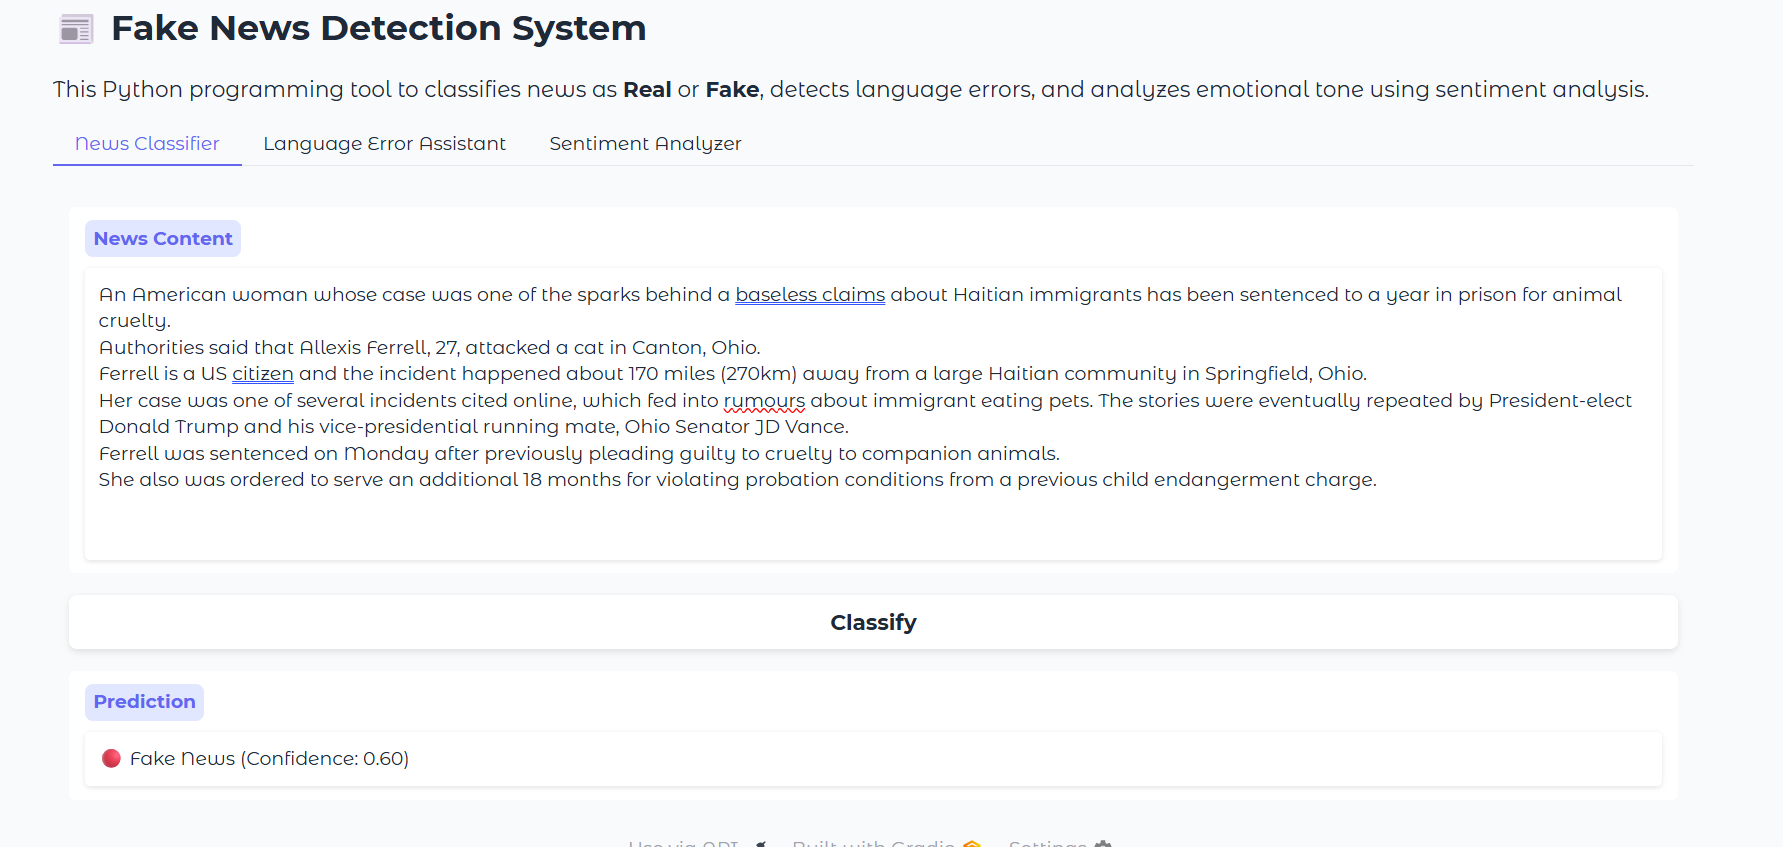

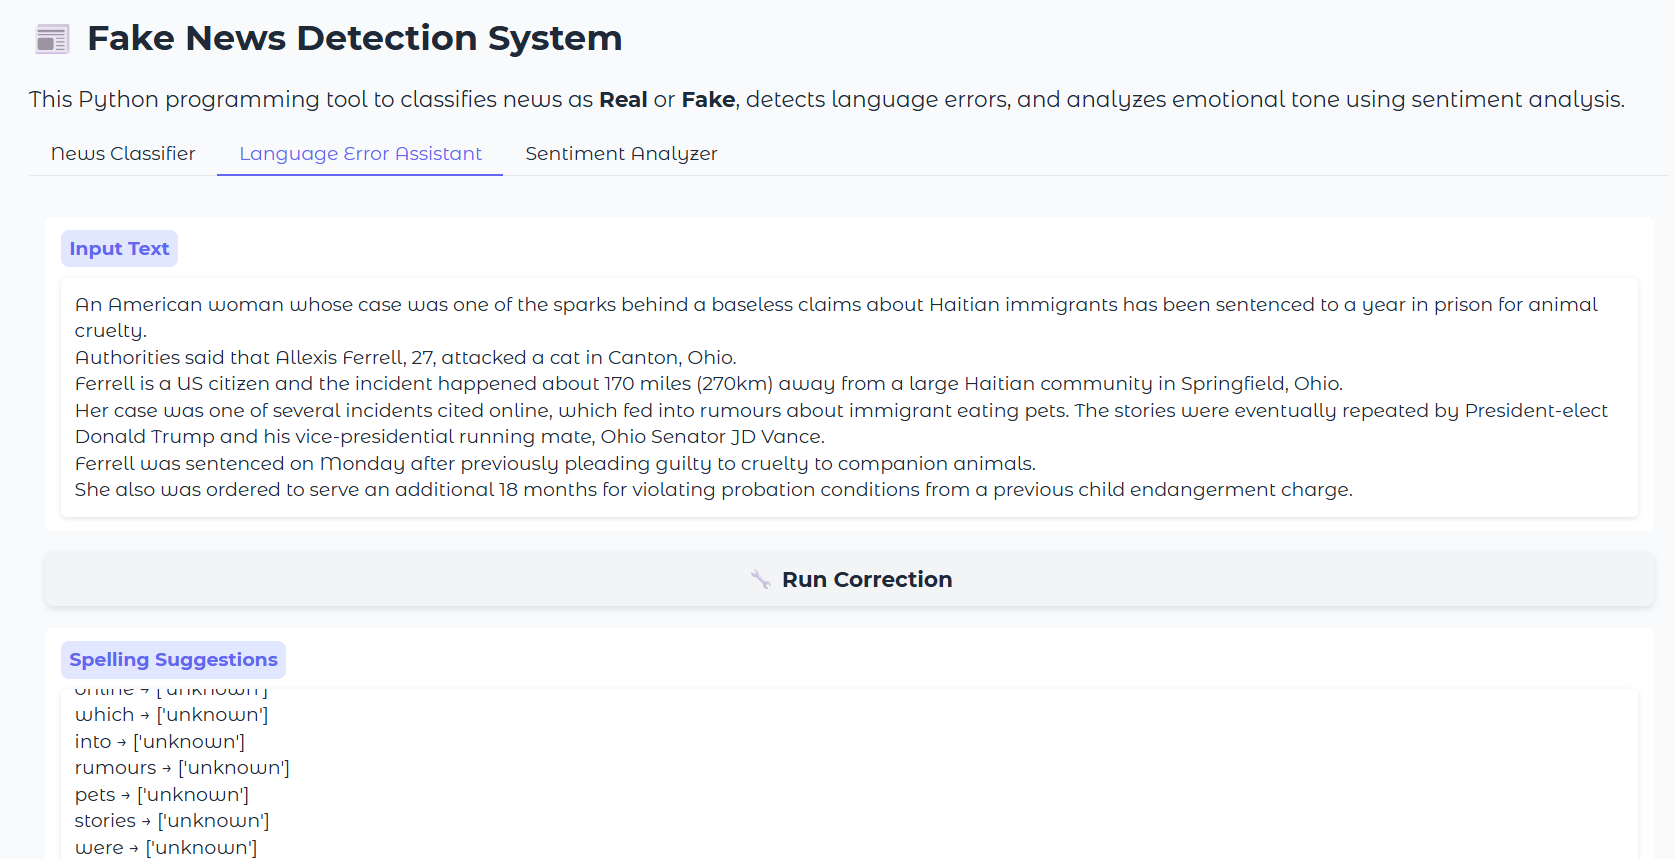

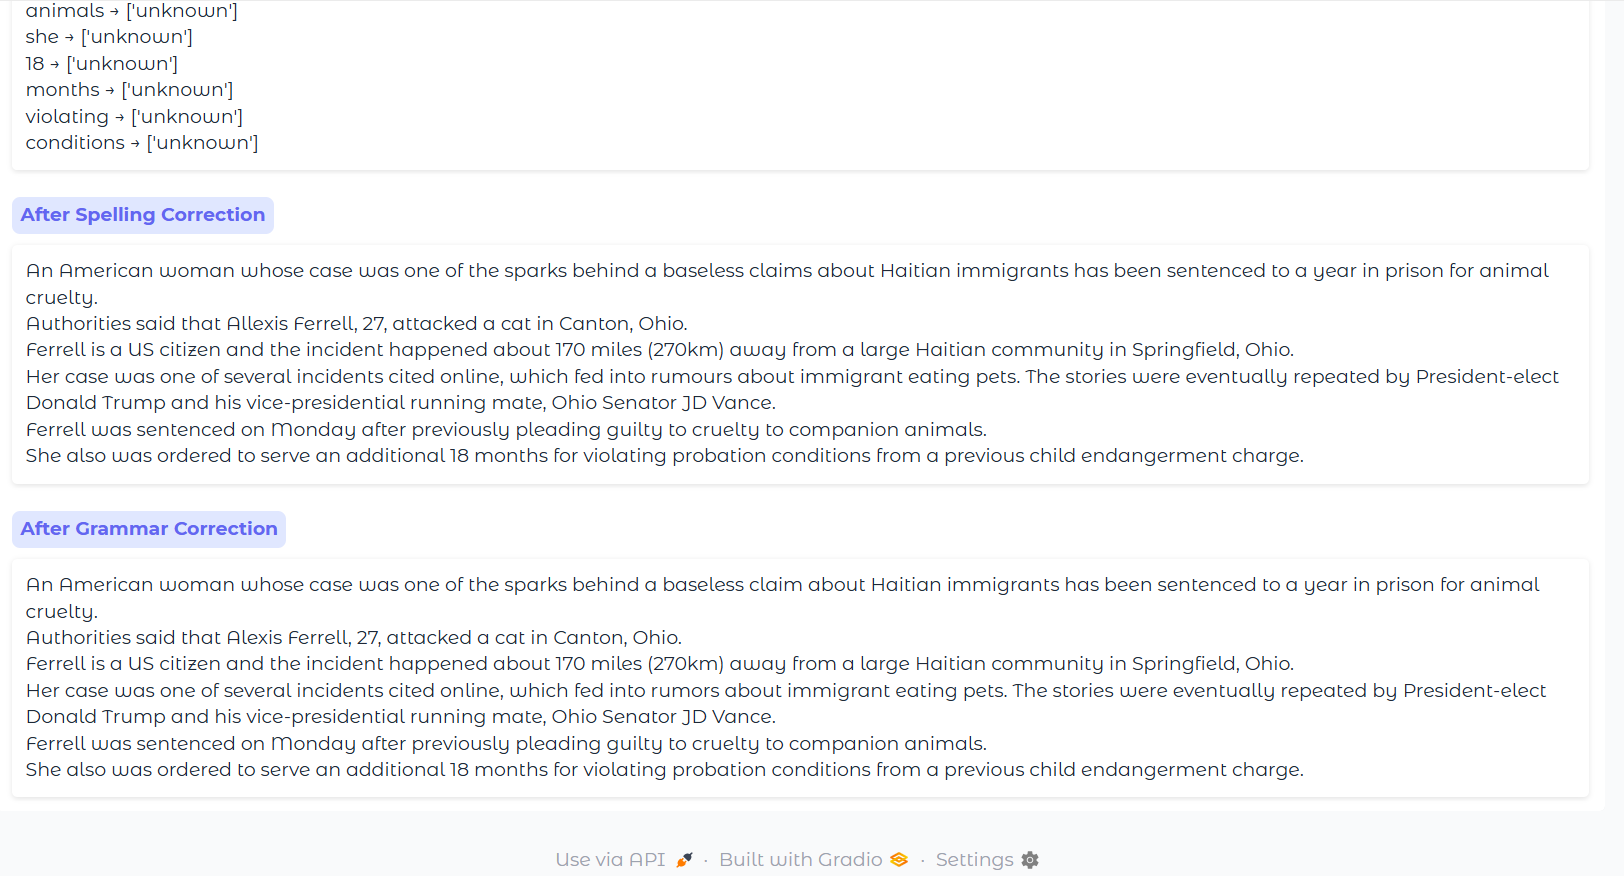

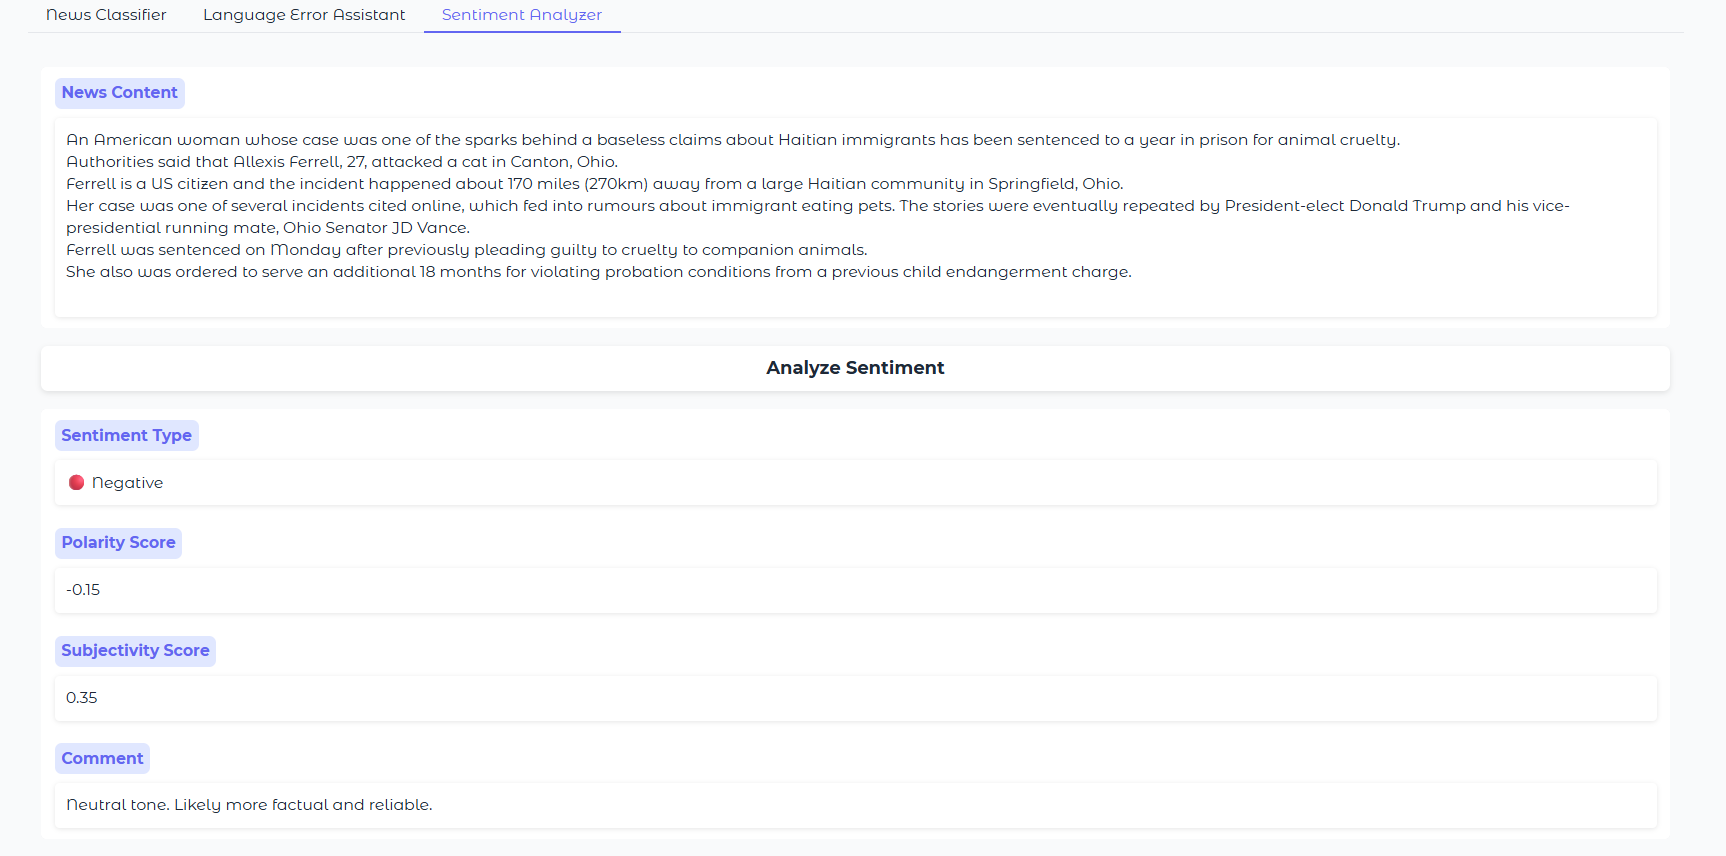